# 🏎️💨 Formula 1 Data Analysis - 70 Years of Racing History

Welcome back to this EDA project based on 70 years of Formula 1 racing. The dataset includes driver statistics, team information, race outcomes, and country data.

The objective is to uncover patterns in driver success, podium finishes, point accumulation, and country-based performance using data visualization and descriptive statistics.

## 🔎 Questions Explored Include:

- Who are the top 5 podium drivers of all time?
- How are points distributed across drivers in the 2022 season?
- What is the average age of Formula 1 drivers?
- Which countries have produced the most successful drivers?
- What is the correlation between number of GP entries and total points?
- Are there patterns in highest finishes and championship wins?

**💡 As someone not too familiar with Formula 1, this fact really caught my interest: Not a single driver who started the race at position 5 or lower, has secured a podium finish at the end of the race. This stresses the importance of a strong qualifier prior to the actual race.**

> 💬 **Note:** This project was developed as part of my Data Analysis certification training at **Experience Design Institut (XDi)**. This dataset was used for practicing real-world data cleaning, analysis, and storytelling skills. 

### Preparation

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the Formula 1 dataset for the 2022 season
url = 'https://github.com/toUpperCase78/formula1-datasets/raw/master/Formula1_2022season_drivers.csv'
f1_df = pd.read_csv(url)

In [8]:
# Select relevant columns
selected_columns = ['Driver', 'Abbreviation', 'No', 'Team', 'Country', 'Podiums', 'Points', 'Grands Prix Entered',
                     'World Championships', 'Highest Race Finish', 'Highest Grid Position', 'Date of Birth', 'Place of Birth']
f1_df = f1_df[selected_columns]

### 📊 EDA

Q1: Who were the top 5 podium drivers during the 2022 season?

In [15]:
#Top 5 podium driver
top_5_podium_driver = f1_df.sort_values(by='Podiums', ascending=False).head(5)
top_5_podium_driver

,Driver,Abbreviation,No,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
5,Lewis Hamilton,HAM,44,Mercedes,United Kingdom,191,4405.5,310,7,1(x103),1,07/01/1985,"Stevenage, England"
11,Sebastian Vettel,VET,5,Aston Martin,Germany,122,3098.0,300,4,1(x53),1,03/07/1987,"Heppenheim, Germany"
8,Fernando Alonso,ALO,14,Alpine,Spain,98,2061.0,358,2,1(x32),1,29/07/1981,"Oviedo, Spain"
0,Max Verstappen,VER,1,Red Bull Racing,Netherlands,77,2011.5,163,2,1(x35),1,30/09/1997,"Hasselt,Belgium"
9,Valtteri Bottas,BOT,77,Alfa Romeo,Finland,67,1787.0,200,0,1(x10),1,28/08/1989,"Nastola, Finland"


Q2: How do points distribute during the 2022 season?

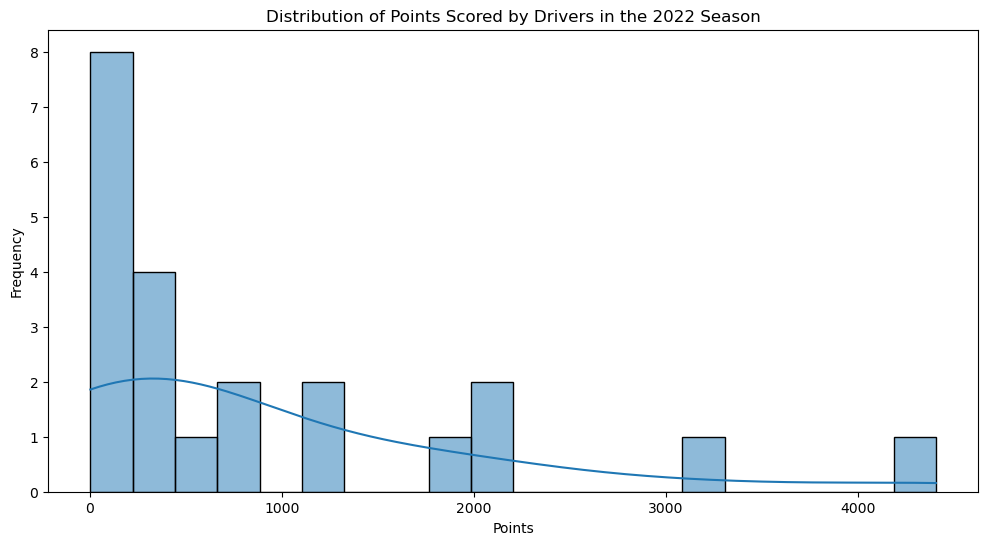

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(f1_df['Points'], bins=20, kde=True)
plt.title('Distribution of Points Scored by Drivers in the 2022 Season')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

The above histplot shows that only a very few drivers accumulate points above 1000.
Actually, only one driver has either >3000 or >4000 points.

In a next step, let's see who those drivers are to get a deeper feeling for the 2022 performance data.

In [22]:
#Distribution of points in the 2022 season
points_distribution = f1_df[['Driver','Points']].sort_values(by='Points', ascending=False)
points_distribution

,Driver,Points
5,Lewis Hamilton,4405.5
11,Sebastian Vettel,3098.0
8,Fernando Alonso,2061.0
0,Max Verstappen,2011.5
9,Valtteri Bottas,1787.0
10,Daniel Ricciardo,1311.0
2,Sergio Perez,1201.0
1,Charles Leclerc,868.0
4,Carlos Sainz,782.5
21,Nico Hulkenberg,521.0


<Figure size 1500x500 with 0 Axes>

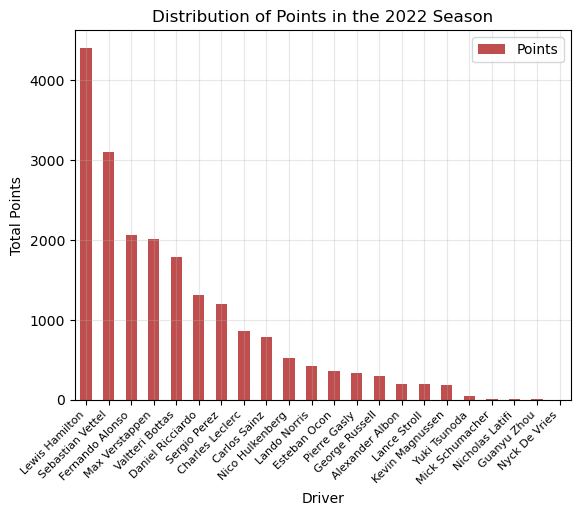

In [48]:
#Visualizing
plt.figure(figsize=(15,5))
points_distribution.plot(kind='bar', x='Driver', y='Points', color='firebrick', alpha=0.8)
plt.grid(True, alpha=0.3)
plt.title('Distribution of Points in the 2022 Season')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylabel('Total Points')
plt.xlabel('Driver')
plt.show()

We now see who those selected, top-tier drivers are. 
Lewis Hamilton was the only 2022 driver to receive more than 4000 points. 
Sebastian Vettel, another Formula 1 legend, accumulated a little over 3000 points. 

The majority of 2022's drivers had only below 1000 points.

Q3: What was 2022's average driver age?

In [280]:
#Average driver age in the 2022 season
#Date of Birth column to datetime 
f1_df['Date of Birth'] = pd.to_datetime(f1_df['Date of Birth'], dayfirst=True, errors='coerce')

#Extract birth day
f1_df['Birth Year'] = f1_df['Date of Birth'].dt.year
f1_df['Age_2022'] = 2022 - f1_df['Birth Year']
f1_df[['Driver','Age_2022']]

,Driver,Age_2022
0,Max Verstappen,25
1,Charles Leclerc,25
2,Sergio Perez,32
3,George Russell,24
4,Carlos Sainz,28
5,Lewis Hamilton,37
6,Lando Norris,23
7,Esteban Ocon,26
8,Fernando Alonso,41
9,Valtteri Bottas,33


In [70]:
#Avg age
avg_age = f1_df.Age_2022.mean()
print(f'The average driver age in the 2022 season was {avg_age:.2f}')

The average driver age in the 2022 season was 28.41


Q4: Which countries were represented by the drivers during the 2022 season?

In [119]:
driver_per_country = f1_df.groupby('Country')['Driver'].count().reset_index().sort_values(by='Driver', ascending=False)
driver_per_country

,Country,Driver
6,Germany,3
13,United Kingdom,3
1,Canada,2
5,France,2
10,Netherlands,2
11,Spain,2
0,Australia,1
2,China,1
3,Denmark,1
4,Finland,1


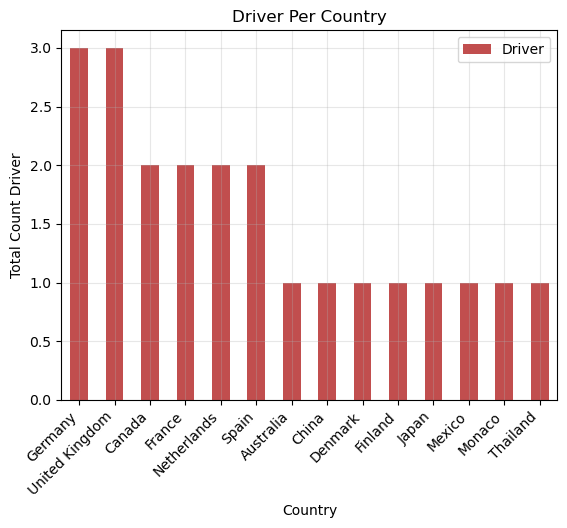

In [131]:
#Visualiziing
driver_per_country.plot(kind='bar', x='Country', y='Driver', color='firebrick',alpha=0.8)
plt.grid(True, alpha=0.3)
plt.title('Driver Per Country')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Count Driver')
plt.show()

With Germany and the UK, only two countries were sending three drivers to the 2022 season. 
Four more countries had two drivers, while the remaining countries had max. 1 driver during the season.

This has ultimate implications on the organization's marketing focus, ensuring that countries with the respected drivers were considered for marketing campaigns, TV screenings, promotion activities, etc. 

Q5: What is the correlation between the variable 'GP entered' and 'Earned points'?

In [32]:
correlation_gp_points = f1_df['Grands Prix Entered'].corr(f1_df['Points'])
print(f'Correlation between Grands Prix Entered and Points Scored: {correlation_gp_points:.2f}')

Correlation between Grands Prix Entered and Points Scored: 0.83


In [138]:
#Correlation between finished GPs and earned points
f1_df.groupby(by='Grands Prix Entered').Points.agg('mean').sort_values(ascending=False).to_frame().rename(columns={'Points':'Avg. Points'})

,Avg. Points
Grands Prix Entered,
310,4405.5
300,3098.0
358,2061.0
200,1787.0
163,1397.0
232,1311.0
236,1201.0
103,868.0
184,521.0


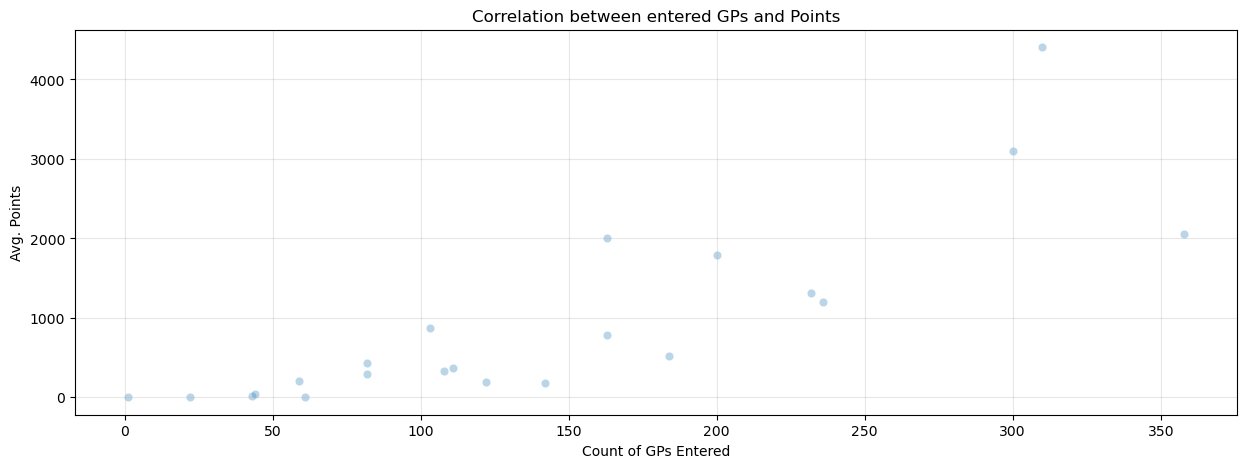

In [146]:
#Visualizing
plt.figure(figsize=(15,5))
sns.scatterplot(x='Grands Prix Entered', y='Points', data=f1_df, alpha=0.3)
plt.title('Correlation between entered GPs and Points')
plt.xlabel('Count of GPs Entered')
plt.ylabel('Avg. Points')
plt.grid(True, alpha=0.3)
plt.show()

Visualizing both variables with a scatterplot shows already a positive relation between both. 
Let's quantify with a correlation coefficient.

In [38]:
correlation_gp_points = f1_df['Grands Prix Entered'].corr(f1_df['Points'])
correlation_gp_points 

0.833158187608354

The positive correlation between both variables might have direct implications on how teams are put together, as more experience ultimately lead to more points.
On the other side, one needs to consider that the more GPs a driver has entered, the points he accumulates either way. A classic case of "chicken-or-the-egg", that could be considered for further analysis.  

Q6: How many 2022 drivers have won a world championship?

In [154]:
#Driver who won a 2022 championship
championship_driver = f1_df.groupby('World Championships')['Driver'].count().to_frame()
championship_driver

,Driver
World Championships,
0,18
2,2
4,1
7,1


In [167]:
count_winner = f1_df[f1_df['World Championships'] > 0]['Driver'].unique()
print(count_winner)

['Max Verstappen' 'Lewis Hamilton' 'Fernando Alonso' 'Sebastian Vettel']


The majority of drivers (18) had zero world championships. 
Actually, only four drivers had won a WC at all. Those were **Verstappen**, **Hamilton**, **Alonso**, and **Vettel**.

Attracting a WC driver for your team will have significant impacts. From team success, to sponsorship deals.

Q7: What was the distribution of points with and without podium?

In [186]:
#Distribution of points with/without podium
podium = f1_df[f1_df['Podiums'] > 0]['Points']
no_podium = f1_df[f1_df['Podiums'] == 0]['Points']

print(f'Average Points with Podium: {podium.mean().round(2)}')
print(f'Average Points without Podium: {no_podium.mean().round(2)}')

Average Points with Podium: 1220.09
Average Points without Podium: 99.0


Q8: What is the correlation between entered GPs and the highest grid position?

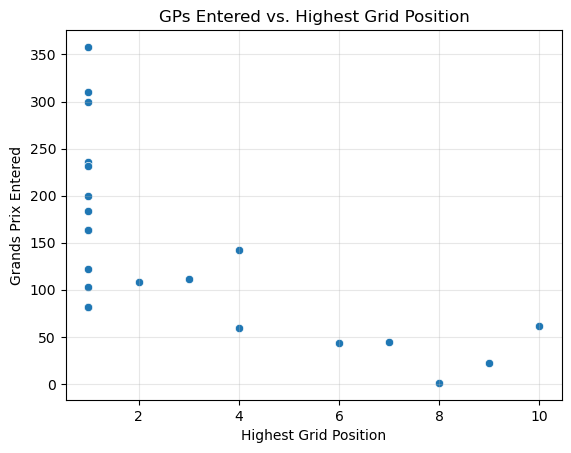

In [211]:
#Correlation between completed GPs and highest race finish
#Extracting finish position
finish_position = f1_df['Highest Race Finish'].str.split('(').str[0].astype(int)

sns.scatterplot(y='Grands Prix Entered', x='Highest Grid Position', data=f1_df)
plt.title('GPs Entered vs. Highest Grid Position')
plt.grid(True, alpha=0.3)
plt.show()

In [215]:
correlation = f1_df['Grands Prix Entered'].corr(f1_df['Highest Grid Position'])
correlation.round(2)

-0.66

We see a negative relation between both variables. The more GPs a driver has entered (More experience!), the higher the grid position. 

Q9: On average, how many points did the top 3 driver accumulate?

In [52]:
top3_teams = f1_df['Team'].value_counts().nlargest(3).index
avg_points_top3_teams = f1_df[f1_df['Team'].isin(top3_teams)]['Points'].mean()
print(f'Average Points Score for Drivers from the Top 3 Teams in 2022: {avg_points_top3_teams:.2f}')

Average Points Score for Drivers from the Top 3 Teams in 2022: 904.69


Q10: Where do drivers come from?

In [255]:
#Distribution of birth cities 
#Extracting cities and regions
f1_df[['birth_city','birth_region']] = f1_df['Place of Birth'].str.strip().str.split(',', expand=True)
f1_df.groupby(['birth_region', 'birth_city']).size().sort_values(ascending=False).to_frame()

0
birth_region birth_city            
 Canada      Montreal             2
 Australia   Perth                1
 Germany     Heppenheim           1
 Switzerland Vufflens-le-Chateau  1
 Spain       Oviedo               1
             Madrid               1
 Normandy    Evreux               1
 Netherlands Uitwellingerga       1
 Monaco      Monte Carlo          1
 Mexico      Guadalajara          1
 Japan       Sagamihara           1
 Germany     Emmerich am Rhein    1
 France      Rouen                1
 Finland     Nastola              1
 England     Stevenage            1
             London               1
             King's Lynn          1
             Bristol              1
 Denmark     Roskilde             1
 China       Shanghai             1
Belgium      Hasselt              1

Putting together a diverse team from different cultural backgrounds can increase a team's performance as well as international sponsorship opportunities. 

Q11: What's the average podium placement by grid position?

In [261]:
#Average podium placement for driver with different grid position
podium_average = f1_df.groupby('Highest Grid Position')['Podiums'].mean().round(2).to_frame()
podium_average

,Podiums
Highest Grid Position,
1,51.54
2,3.00
3,2.00
4,1.50
6,0.00
7,0.00
8,0.00
9,0.00
10,0.00


As expected, there is a clear relation between the grid position and the average podium placement. 
If a driver has a strong initial placement, the higher the likelihood of a strong podium finish.

Interestingly - at least for someone not too familiar with Formula 1 - not a single driver who started at position 6 or lower, has secured a podium finish. 

Q12: Which teams did WC drivers drive for?

In [272]:
#Championship winning drivers
winning_drivers = f1_df[f1_df['World Championships'] > 0]
championship_per_team = winning_drivers['Team'].value_counts().to_frame()
championship_per_team

,count
Team,
Red Bull Racing,1
Mercedes,1
Alpine,1
Aston Martin,1


Q13: What is the correlation between the average age of a driver and the GPs entered?

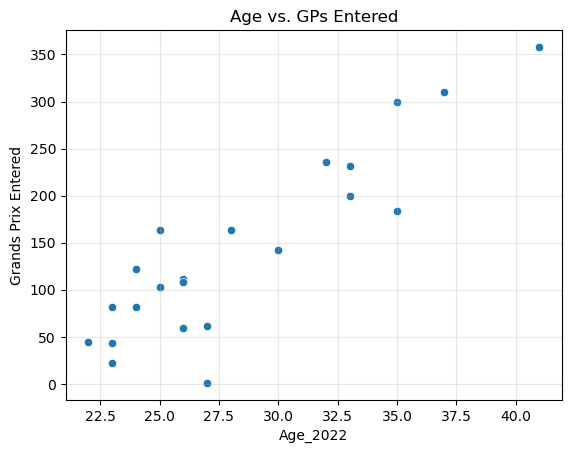

In [284]:
#Correlation between average driver age and entered GPs
f1_df['Age_2022'] = 2022 - f1_df['Birth Year']
sns.scatterplot(x='Age_2022', y='Grands Prix Entered',data=f1_df)
plt.title('Age vs. GPs Entered')
plt.grid(True, alpha=0.3)
plt.show()

In [289]:
correlation = f1_df['Age_2022'].corr(f1_df['Grands Prix Entered'])
correlation.round(2)

0.89

As expected, we see a clear positive relation between both variables.
The higher the age, the more GPs a driver has tentatively entered. 

Equiping your team with experienced drivers will most likely have a significant benefit, as experience can make the difference between winning and losing - as in any sports.

Q14: What is the average point accumulation for drivers with and without World Championships?

In [299]:
#Average points for championship and non-championsip drivers
f1_df.groupby(by='World Championships').Points.agg('mean').round(2).to_frame().rename(columns={'Points':'Avg. Points'})

,Avg. Points
World Championships,
0,474.42
2,2036.25
4,3098.00
7,4405.50


In [309]:
with_cs = f1_df[f1_df['World Championships'] > 0]['Points']
no_cs = f1_df[f1_df['World Championships'] == 0]['Points']
print(f'Average Points with Championship: {with_cs.mean()} Points')
print(f'Average Points without Championship: {no_cs.mean().round(2)} Points')

Average Points with Championship: 2894.0 Points
Average Points without Championship: 474.42 Points
